In [3]:
# Import necessary libraries
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input  # Ensure Input is imported
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [5]:
# Set image dimensions
img_height, img_width = 150, 150

In [7]:
# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((img_width, img_height))
        images.append(np.array(img))
    return images

In [9]:
# Load datasets
covid_path = 'COVID-19_Radiography_Dataset/COVID/images'
normal_path = 'COVID-19_Radiography_Dataset/Normal/images'

In [11]:
covid_images = load_images_from_folder(covid_path)
normal_images = load_images_from_folder(normal_path)

In [12]:
# Create labels
covid_labels = [1] * len(covid_images)  # 1 for COVID
normal_labels = [0] * len(normal_images)  # 0 for Normal

In [13]:
# Combine datasets
all_images = np.array(covid_images + normal_images) / 255.0
all_labels = np.array(covid_labels + normal_labels)

In [17]:
# Ensure data has 4 dimensions (samples, height, width, channels)
all_images = np.expand_dims(all_images, axis=-1)

# Check the shape of all_images
print(f"Shape of all images: {all_images.shape}")

all_labels = np.array(covid_labels + normal_labels)

Shape of all images: (13808, 150, 150, 1)


In [19]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

In [21]:
# Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [23]:
# Define a simple CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 1)),  # Use Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [25]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [29]:
# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

Epoch 1/10


/home/aditya/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.7392 - loss: 0.5605 - val_accuracy: 0.7350 - val_loss: 0.4721
Epoch 2/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 59s 171ms/step - accuracy: 0.7512 - loss: 0.4882 - val_accuracy: 0.7364 - val_loss: 0.5138
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 60s 172ms/step - accuracy: 0.7618 - loss: 0.4774 - val_accuracy: 0.8193 - val_loss: 0.4094
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 59s 171ms/step - accuracy: 0.7777 - loss: 0.4593 - val_accuracy: 0.8161 - val_loss: 0.3838
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 60s 173ms/step - accuracy: 0.7874 - loss: 0.4331 - val_accuracy: 0.8030 - val_loss: 0.3858
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 61s 176ms/step - accuracy: 0.7903 - loss: 0.4250 - val_accuracy: 0.8157 - val_loss: 0.3603
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 62s 177ms/step - accuracy: 0.8137 - loss: 0.4023 - val_accuracy: 0.8476 - val_loss: 0.3265
Epoch 8/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 62s 178ms/step - accuracy: 0.8253 - loss: 0.3808 - val

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9038 - loss: 0.2745
Test Accuracy: 90.33%


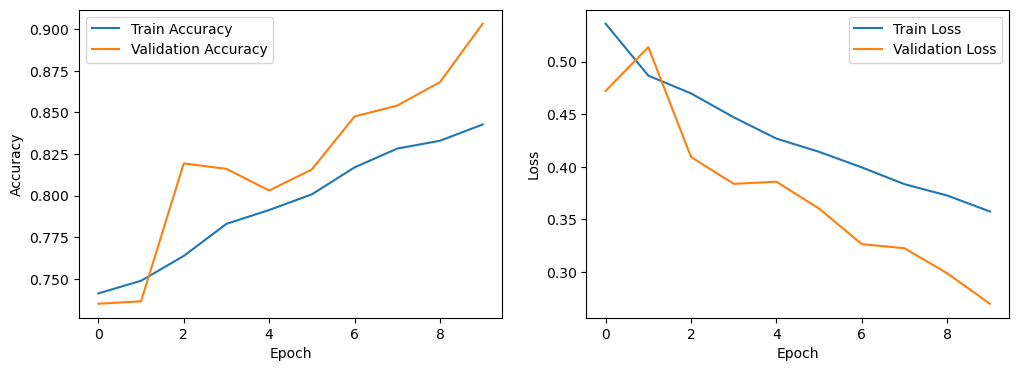

In [33]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [37]:
# Function to predict COVID or Normal from an X-ray image
def predict_covid(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # Adjust for grayscale

    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    pred_class = np.argmax(prediction, axis=1)

    return "COVID Detected" if pred_class[0] == 1 else "Normal"

In [45]:
# Example prediction
image_path = '76052f7902246ff862f52f5d3cd9cd_big_gallery.jpg'  
result = predict_covid(image_path)
print(f"The given X-ray is classified as: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The given X-ray is classified as: Normal
